In [1]:
import sys
import os
import gc
gc.collect()
os.environ['CUDA_VISIBLE_DEVICES'] = '0, 1, 2'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {'0', '1', '2'}

import cv2
import numpy as np
sys.path.insert(1, '../../Src/')

from models.mediapipe import model_mediapipe
model = model_mediapipe.MODEL_mediapipe()

import matplotlib.pyplot as plt
import face_recognition
import json
import glob


/media/cristian/12FF1F6D0CD48422/Tesis/env_3.10_com/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


# Create DataBase

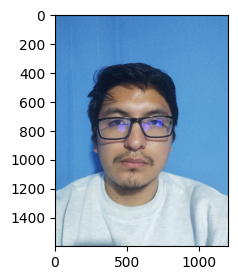

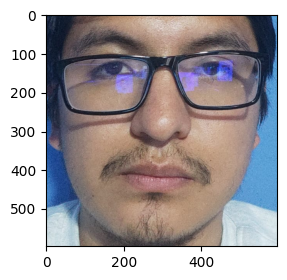

In [2]:
img_bgr = cv2.imread("images/database/cristian_1.jpeg")
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(3,3))
plt.imshow(img_rgb)
plt.show()
boxes, scores= model.predict(img_bgr)
if len(boxes)>0:
    box = boxes[0]
    fig = plt.figure(figsize=(3,3))
    img_face = img_rgb[box[1]:box[3],box[0]:box[2],:]
    plt.imshow(img_face)
    plt.show()

In [3]:
list_images = glob.glob('images/database/*')


dict_faces = {}

for path in list_images:
    name = path.split('/')[-1].split('_')[0]        
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

    boxes, scores= model.predict(img_bgr)
    if len(boxes)>0:
        boxes_face = []
        for [x1, y1, x2, y2] in boxes:
            boxes_face.append([y1, x2, y2, x1])
        face_encodings = face_recognition.face_encodings(img_bgr, boxes_face, num_jitters=-1)[0]
        
        if name in dict_faces:
            dict_faces[name].append(face_encodings.tolist())
        else:
            dict_faces[name] = [face_encodings.tolist()]

json_obj = json.dumps(dict_faces, indent = 4, sort_keys = True)
# Writing to sample.json
with open("results/dict_faces.json", "w") as outfile:
    outfile.write(json_obj)

# Testing Face Recognition

In [4]:
with open("results/dict_faces.json", "r") as outfile:
    # Reading from json file
    json_object = json.load(outfile)
    
list_names = []
list_embeddings = []

for name in json_object.keys():
    embeddings = json_object[name]
    for embedding in embeddings:
        list_names.append(name)
        list_embeddings.append(embedding)

list_names      = np.array(list_names)
list_embeddings = np.array(list_embeddings)


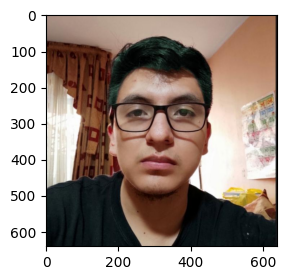

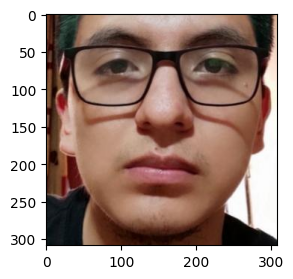

In [5]:
img_bgr = cv2.imread("images/test/cristian.jpg")
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(3,3))
plt.imshow(img_rgb)
plt.show()
boxes, scores= model.predict(img_bgr)
if len(boxes)>0:
    boxes_face = []
    for [x1, y1, x2, y2] in boxes:
        boxes_face.append([y1, x2, y2, x1])
    box = boxes[0]
    fig = plt.figure(figsize=(3,3))
    img_face = img_rgb[box[1]:box[3],box[0]:box[2],:]
    plt.imshow(img_face)
    plt.show()
    face_encodings = face_recognition.face_encodings(img_bgr, boxes_face, num_jitters=-1)[0]


In [33]:
boxes_face

[[201, 466, 510, 157]]

In [6]:
face_distances = face_recognition.face_distance(list_embeddings, face_encodings)

In [7]:
face_distances

array([0.41204858, 0.48743555, 0.73102037, 0.67564439])

In [8]:
list_names


array(['cristian', 'cristian', 'kero', 'kero'], dtype='<U8')

In [9]:
index_min      = np.argpartition(face_distances,2)

In [10]:
list_names[index_min[0]]

'cristian'

In [11]:
index_min

array([0, 1, 3, 2])

In [21]:
text_size, _ = cv2.getTextSize("Holaaaaaaaaaaaaaaaaaaaaaa", cv2.FONT_HERSHEY_PLAIN, 1, 2)


In [22]:
text_size#w, h = 

(224, 10)

In [25]:
import collections

In [30]:
counter = collections.Counter([1,1,1,2,2])
most_commons = counter.most_common(1)

In [31]:
name,count = most_commons[0]

In [32]:
most_commons

[(1, 3)]